## 🧾 1. Dataset Description and Problem Definition

### 📊 Dataset Description

The dataset contains nutritional information for various food items along with a label indicating their dietary category. Each row represents a food item, and the columns include features such as calorie content, sugar, fat, sodium, protein, fiber, and other nutritional attributes.

The target variable is a categorical label that classifies each food into one of three dietary recommendations:

- **More Often** – Healthy items recommended for frequent consumption  
- **In Moderation** – Neutral or balanced items that can be consumed occasionally  
- **Less Often** – Items that should be eaten sparingly due to poor nutritional quality

This dataset allows for analyzing how different nutritional components influence dietary recommendations.

---

### 🎯 Problem Definition

The goal of this task is to build a **multi-class classification model** that can accurately predict the dietary category of a given food item based on its nutritional attributes. The classification problem involves three classes:

- `More Often`  
- `In Moderation`  
- `Less Often`

This task will be approached using **Multinomial Logistic Regression** and **One-vs-Rest Logistic Regression**, applying both with and without regularization. Furthermore, we will address **class imbalance** and explore **data preprocessing strategies** to improve model accuracy and generalization.


In [190]:
import pandas as pd

In [191]:
data = pd.read_csv('food_items.csv')
data.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,'In Moderation'
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,'In Moderation'
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,'In Moderation'


In [192]:
df = data.copy()

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13260 entries, 0 to 13259
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Calories             13260 non-null  float64
 1   Total Fat            13260 non-null  int64  
 2   Saturated Fat        13260 non-null  float64
 3   Monounsaturated Fat  13260 non-null  float64
 4   Polyunsaturated Fat  13260 non-null  float64
 5   Trans Fat            13260 non-null  float64
 6   Cholesterol          13260 non-null  int64  
 7   Sodium               13260 non-null  float64
 8   Total Carbohydrate   13260 non-null  float64
 9   Dietary Fiber        13260 non-null  float64
 10  Sugars               13260 non-null  float64
 11  Sugar Alcohol        13260 non-null  int64  
 12  Protein              13260 non-null  float64
 13  Vitamin A            13260 non-null  int64  
 14  Vitamin C            13260 non-null  int64  
 15  Calcium              13260 non-null 

In [194]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 Calories               0
Total Fat              0
Saturated Fat          0
Monounsaturated Fat    0
Polyunsaturated Fat    0
Trans Fat              0
Cholesterol            0
Sodium                 0
Total Carbohydrate     0
Dietary Fiber          0
Sugars                 0
Sugar Alcohol          0
Protein                0
Vitamin A              0
Vitamin C              0
Calcium                0
Iron                   0
class                  0
dtype: int64


In [195]:
df = df.drop_duplicates()


In [196]:
df.describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.000000,10919.00000,10919.000000,10919.000000
mean,138.802271,4.798333,1.573924,0.335205,0.269639,0.054428,9.735690,264.263513,19.288600,1.700559,7.051882,0.128766,5.015469,6.498489,7.11393,5.457002,5.575144
std,95.269372,5.421372,2.468812,1.304086,2.428624,0.346278,22.003703,278.292824,14.659023,3.583341,8.502057,1.185217,5.720368,18.369988,24.93890,8.932506,9.244576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.800000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
50%,120.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,160.000000,18.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.00000,2.000000,4.000000
75%,180.000000,7.000000,2.000000,0.000000,0.000000,0.000000,10.000000,400.000000,28.000000,3.000000,11.000000,0.000000,7.000000,6.000000,4.00000,8.000000,8.000000
max,2210.000000,43.000000,22.000000,40.000000,235.000000,11.000000,450.000000,2431.000000,270.000000,305.000000,115.000000,31.000000,70.000000,622.000000,1000.00000,110.000000,170.000000


In [197]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)


['Calories', 'Total Fat', 'Saturated Fat', 'Monounsaturated Fat', 'Polyunsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Sugar Alcohol', 'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron']


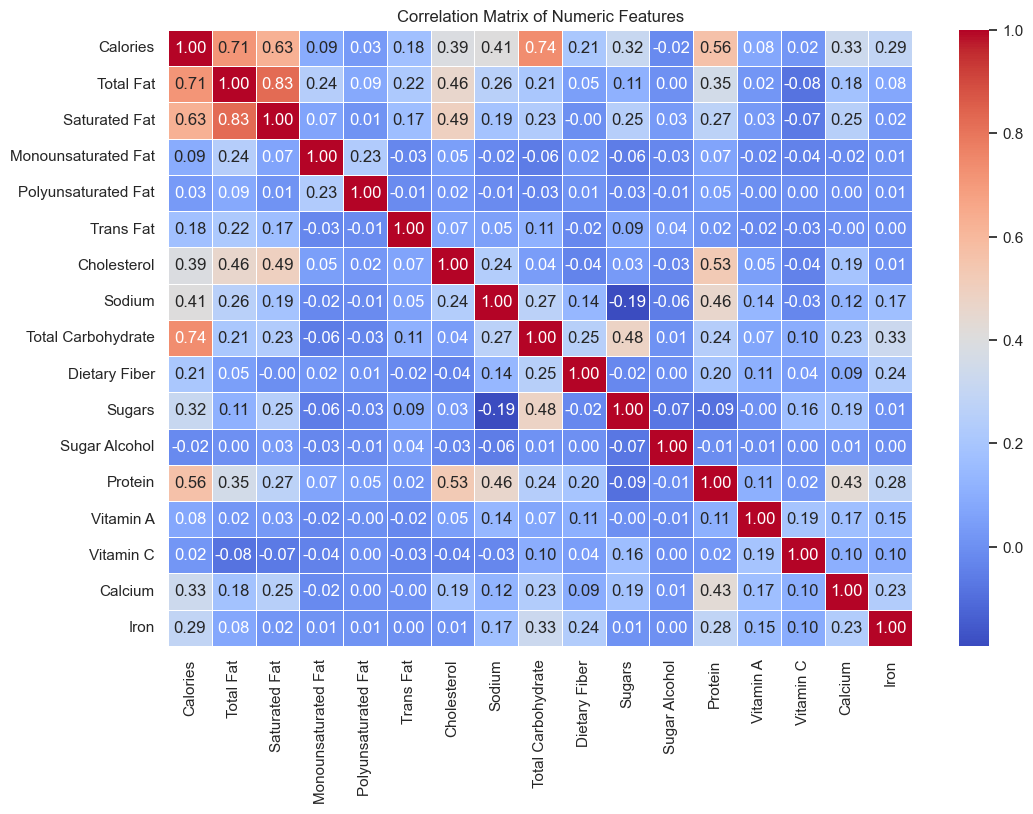

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [199]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_df = numeric_df.corr()

# Display the correlation matrix as a DataFrame
print("Correlation Matrix:\n")
display(corr_df.round(2))  # rounded to 2 decimal places for clarity


Correlation Matrix:



,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
Calories,1.00,0.71,0.63,0.09,0.03,0.18,0.39,0.41,0.74,0.21,0.32,-0.02,0.56,0.08,0.02,0.33,0.29
Total Fat,0.71,1.00,0.83,0.24,0.09,0.22,0.46,0.26,0.21,0.05,0.11,0.00,0.35,0.02,-0.08,0.18,0.08
Saturated Fat,0.63,0.83,1.00,0.07,0.01,0.17,0.49,0.19,0.23,-0.00,0.25,0.03,0.27,0.03,-0.07,0.25,0.02
Monounsaturated Fat,0.09,0.24,0.07,1.00,0.23,-0.03,0.05,-0.02,-0.06,0.02,-0.06,-0.03,0.07,-0.02,-0.04,-0.02,0.01
Polyunsaturated Fat,0.03,0.09,0.01,0.23,1.00,-0.01,0.02,-0.01,-0.03,0.01,-0.03,-0.01,0.05,-0.00,0.00,0.00,0.01
Trans Fat,0.18,0.22,0.17,-0.03,-0.01,1.00,0.07,0.05,0.11,-0.02,0.09,0.04,0.02,-0.02,-0.03,-0.00,0.00
Cholesterol,0.39,0.46,0.49,0.05,0.02,0.07,1.00,0.24,0.04,-0.04,0.03,-0.03,0.53,0.05,-0.04,0.19,0.01
Sodium,0.41,0.26,0.19,-0.02,-0.01,0.05,0.24,1.00,0.27,0.14,-0.19,-0.06,0.46,0.14,-0.03,0.12,0.17
Total Carbohydrate,0.74,0.21,0.23,-0.06,-0.03,0.11,0.04,0.27,1.00,0.25,0.48,0.01,0.24,0.07,0.10,0.23,0.33
Dietary Fiber,0.21,0.05,-0.00,0.02,0.01,-0.02,-0.04,0.14,0.25,1.00,-0.02,0.00,0.20,0.11,0.04,0.09,0.24


In [200]:
df['class'].value_counts()

class
'In Moderation'    5316
'Less Often'       4952
'More Often'        651
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1582845745.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='class', palette='Set2')


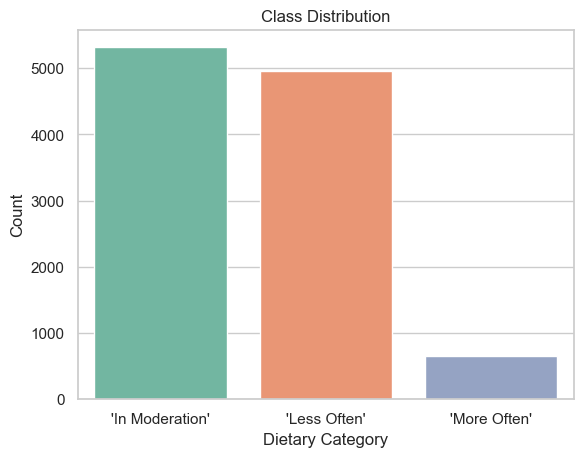

In [201]:

sns.countplot(data=df, x='class', palette='Set2')
plt.title("Class Distribution")
plt.xlabel("Dietary Category")
plt.ylabel("Count")
plt.show()



In [202]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



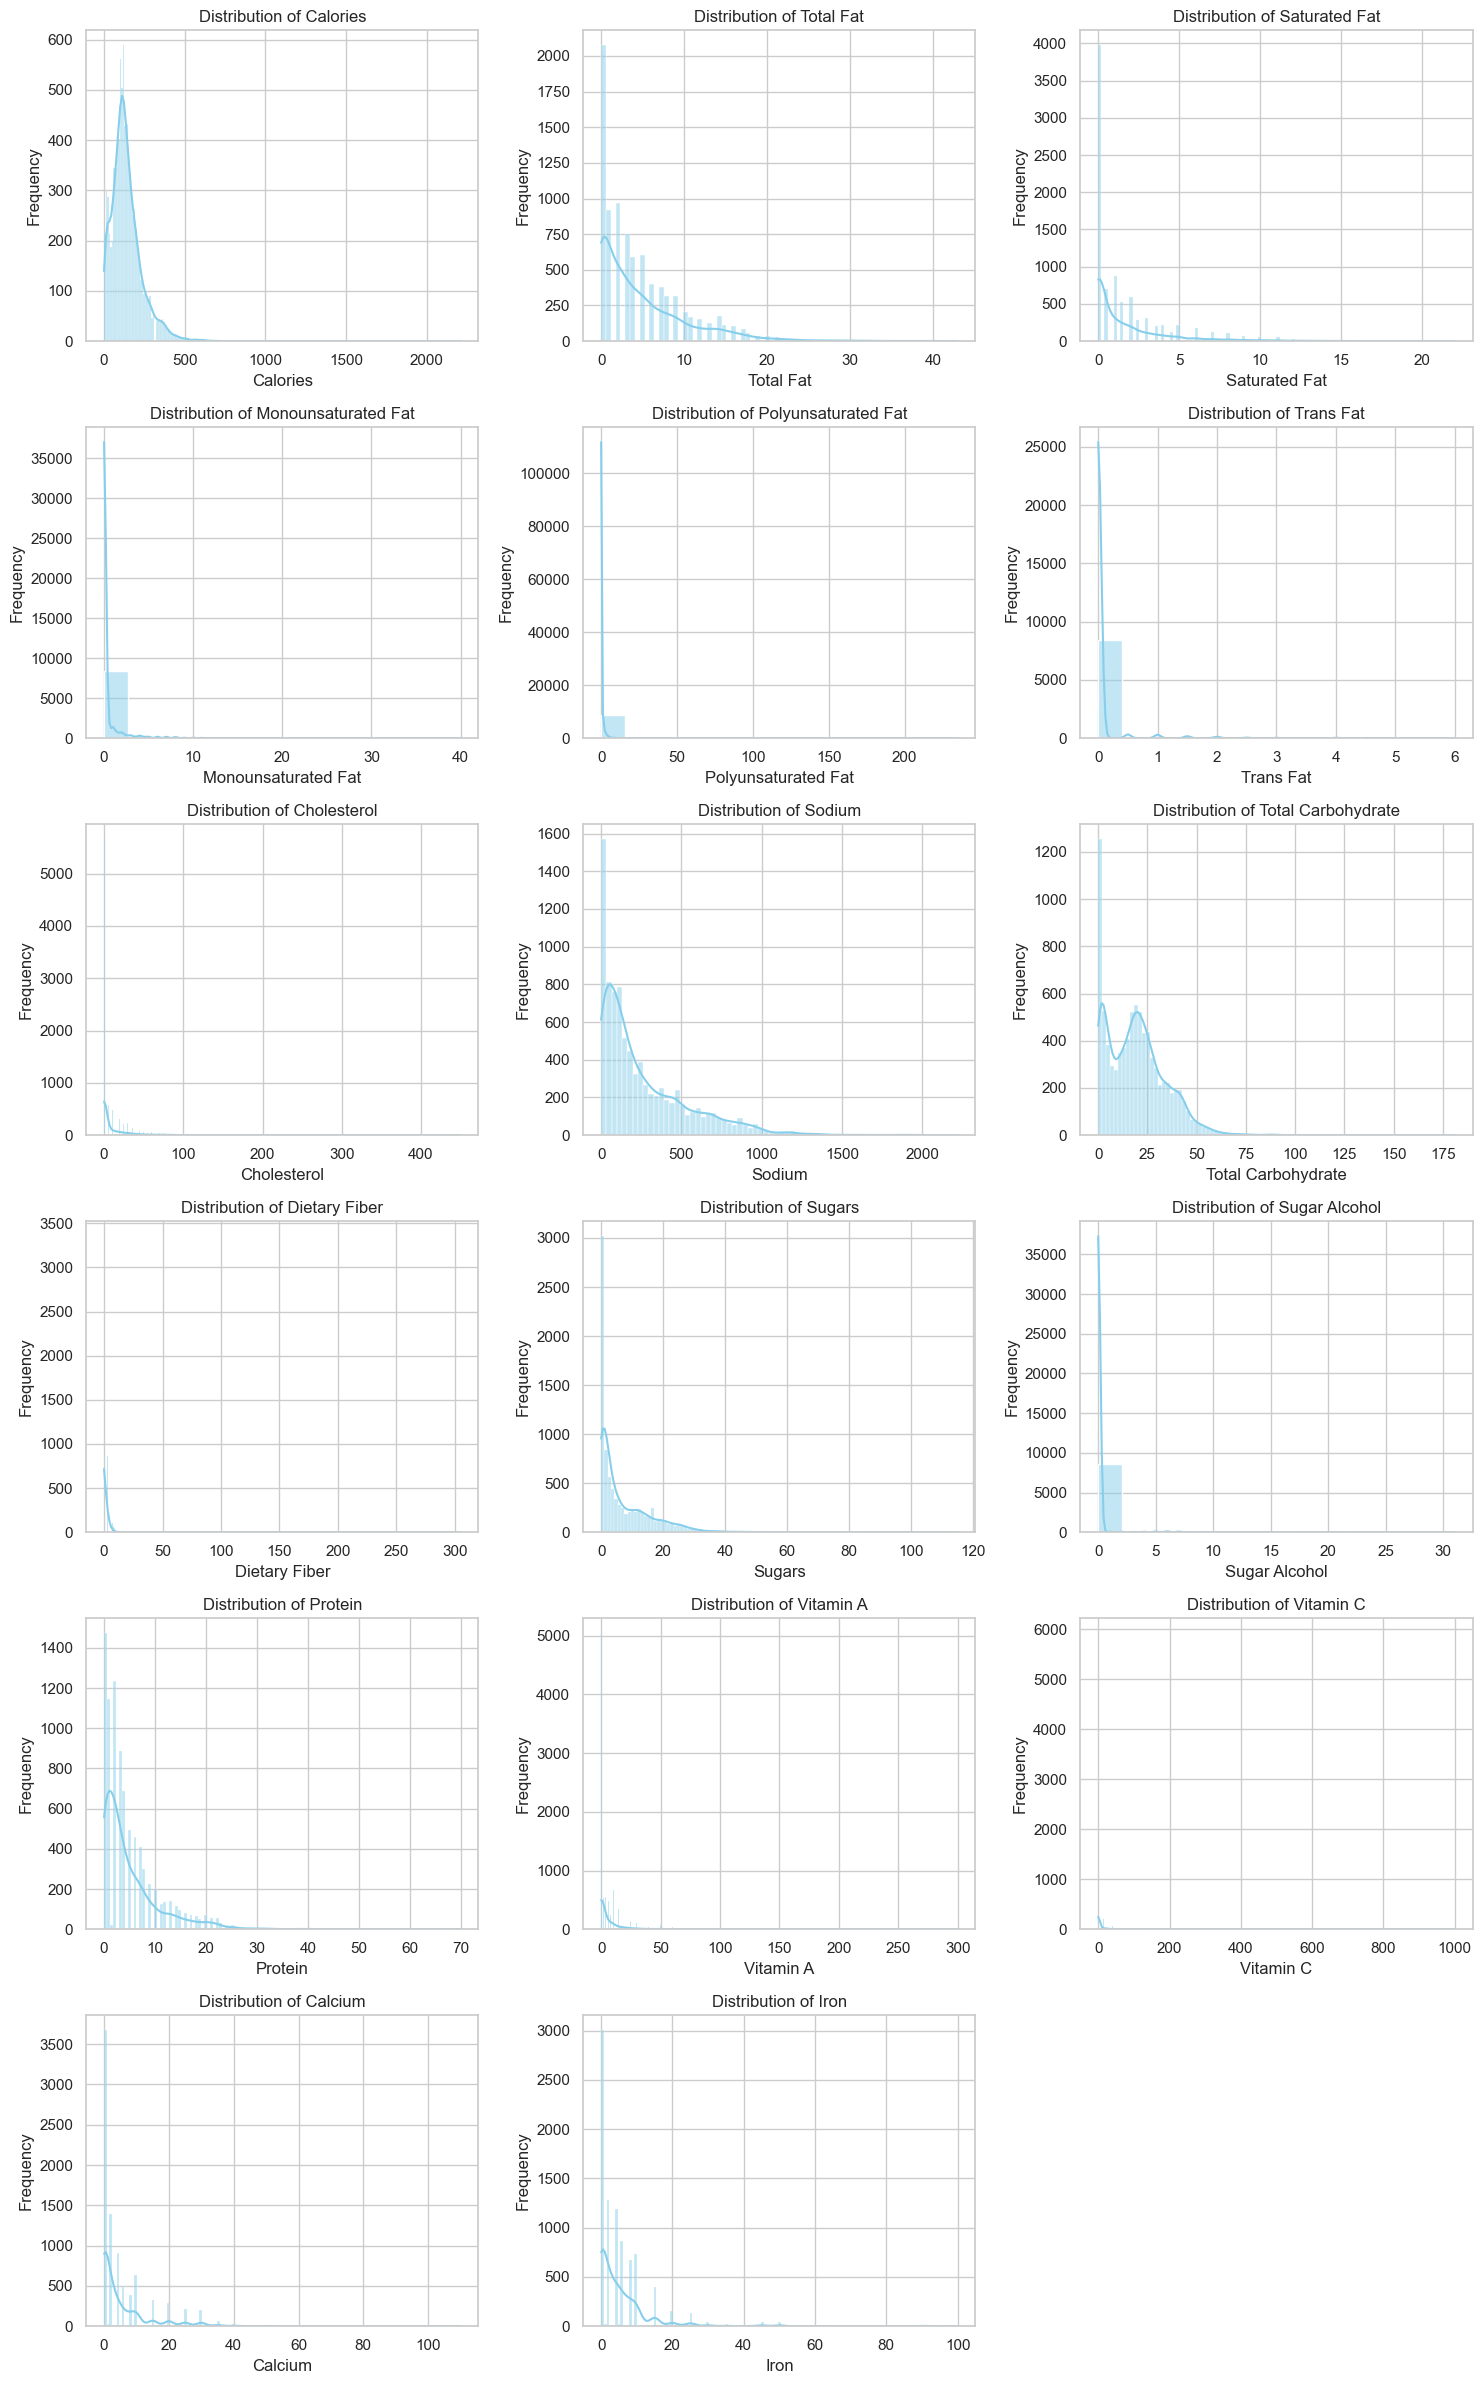

In [203]:

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set up subplots
n_cols = 3  # number of subplots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # calculate rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # adjust size as needed

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X_train[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [204]:
# Calculate skewness
skew_vals = X_train[numeric_cols].skew()

# Filter only columns with skewness > threshold (e.g., 0.75 for right-skew, or < -0.75 for left-skew)
skewed_cols = skew_vals[abs(skew_vals) > 0.75].index.tolist()
print("Skewed Columns:\n", skewed_cols)


skew_vals_test = X_test[numeric_cols].skew()

skewed_cols_test = skew_vals_test[abs(skew_vals_test) > 0.75].index.tolist()
print("Skewed Columns:\n", skewed_cols_test)

Skewed Columns:
 ['Calories', 'Total Fat', 'Saturated Fat', 'Monounsaturated Fat', 'Polyunsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Sugar Alcohol', 'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron']
Skewed Columns:
 ['Calories', 'Total Fat', 'Saturated Fat', 'Monounsaturated Fat', 'Polyunsaturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Sugar Alcohol', 'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron']


In [205]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')  # works even with zero or negative values
X_train[skewed_cols] = pt.fit_transform(X_train[skewed_cols])

X_test[skewed_cols_test] = pt.transform(X_test[skewed_cols_test])


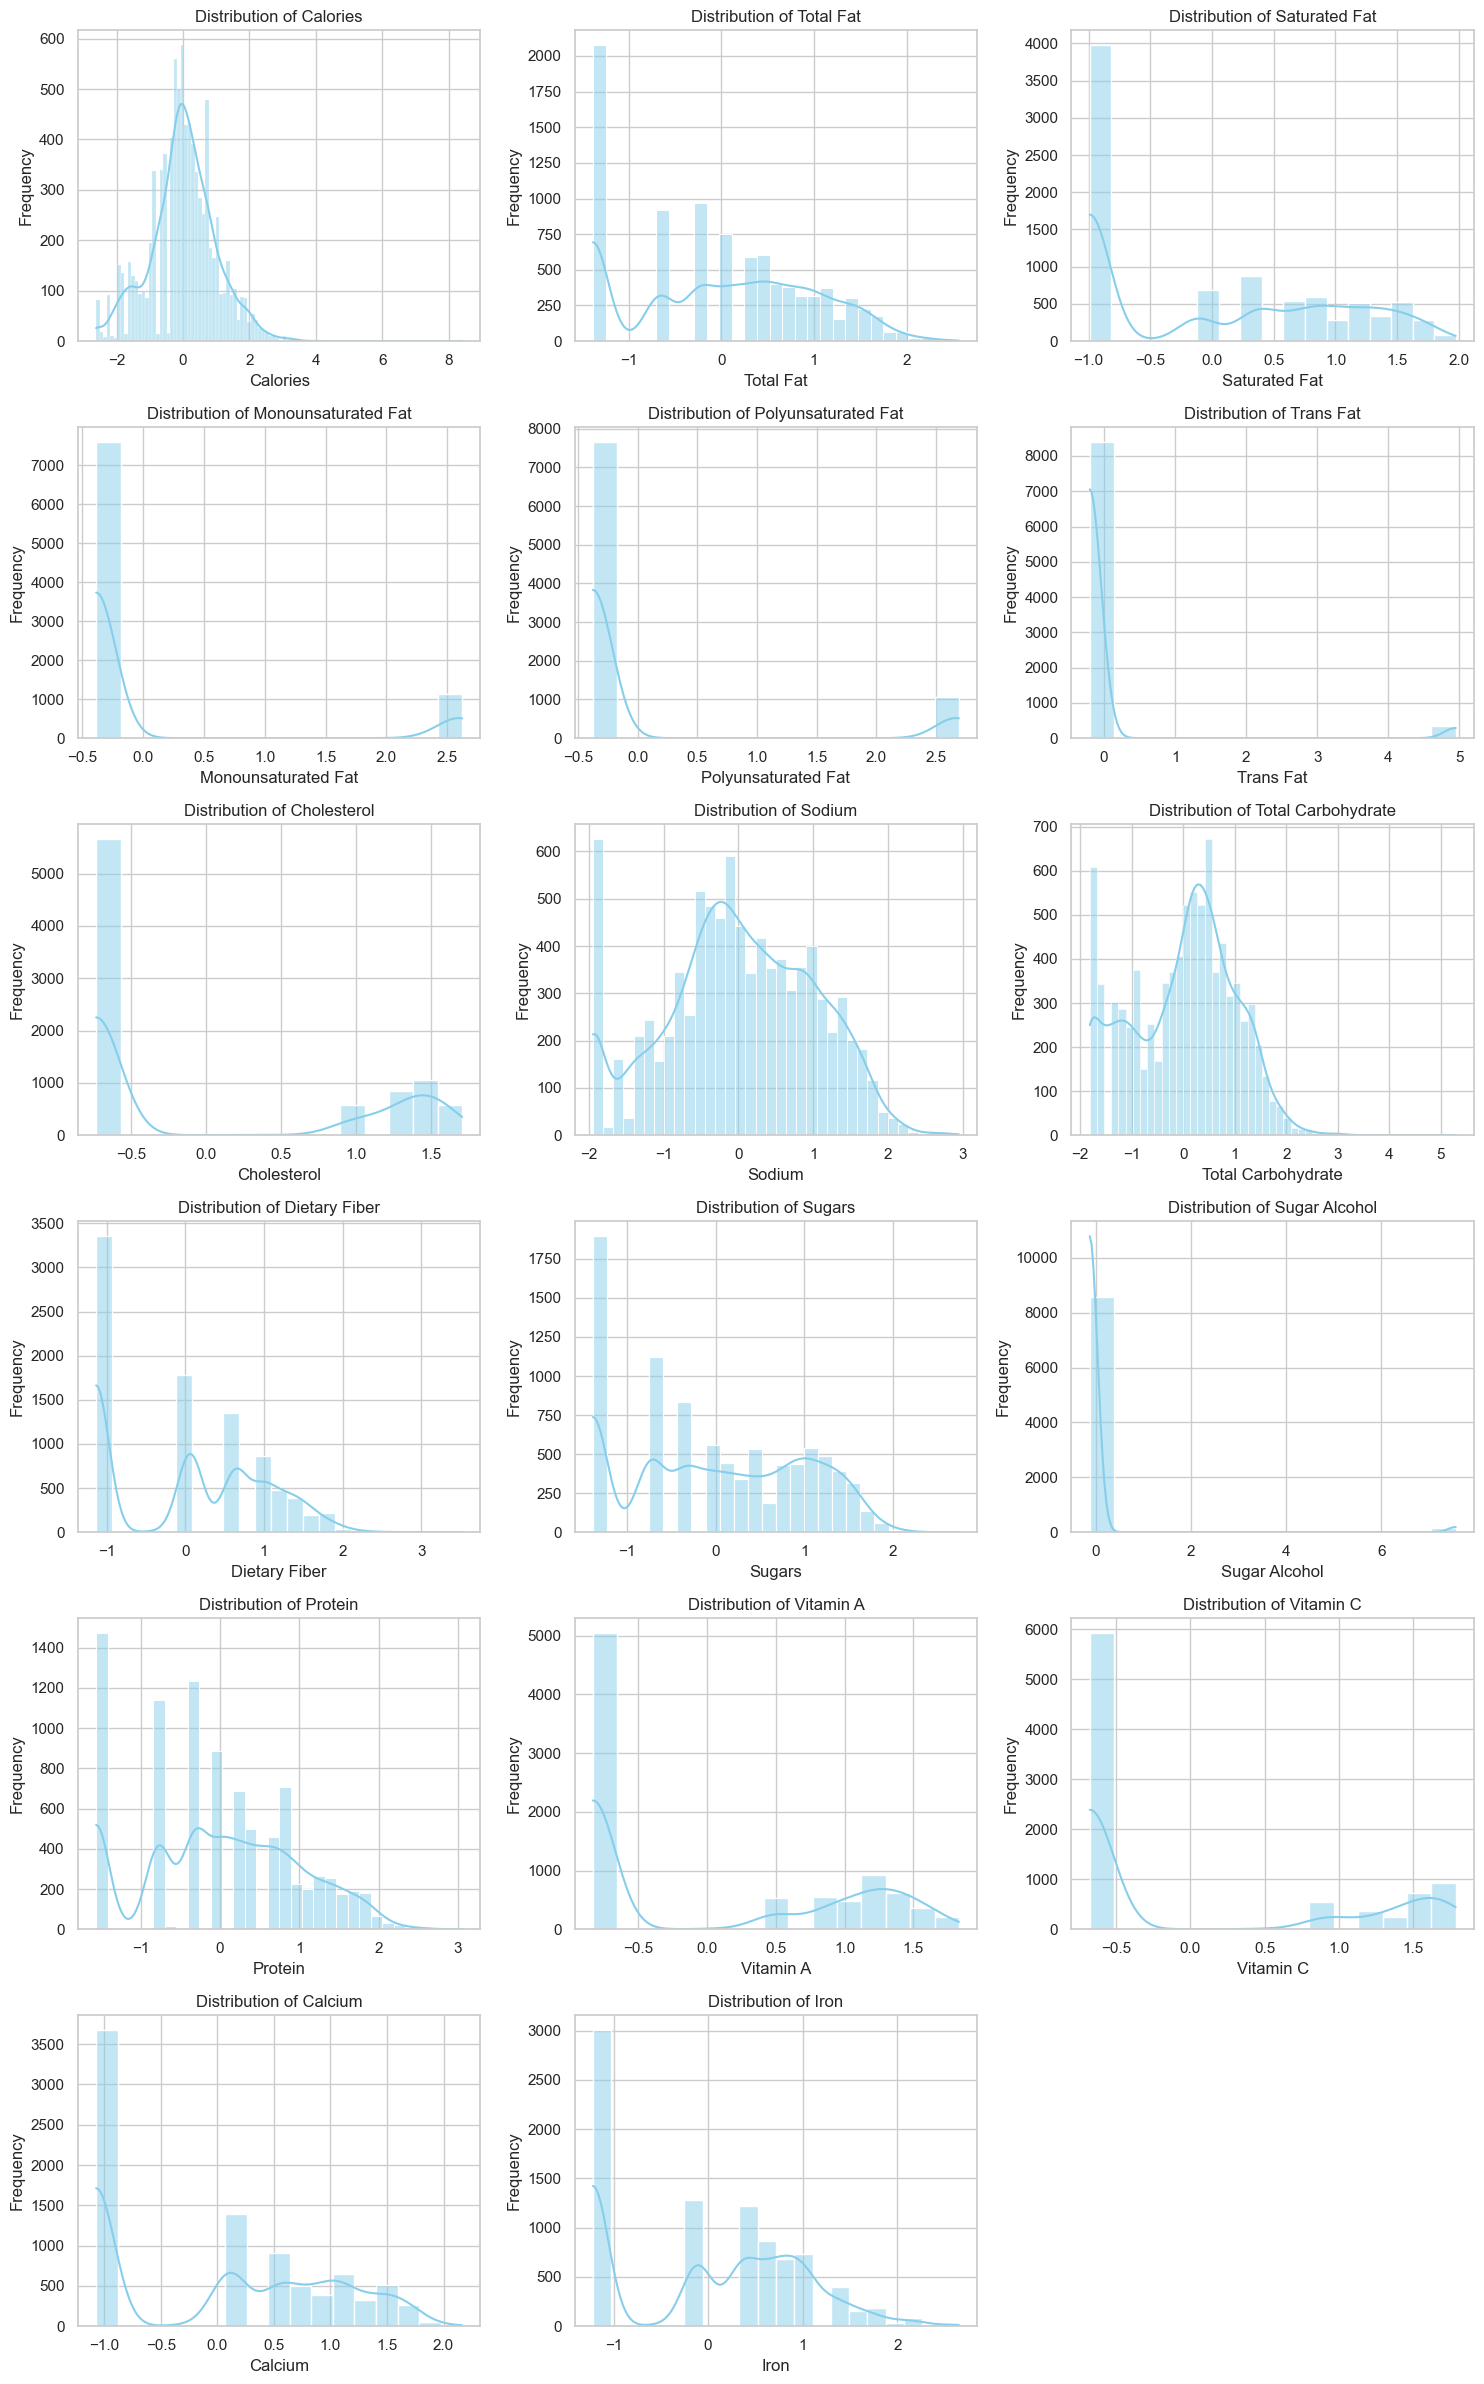

In [206]:

# Select numeric columns
numeric_cols = X_train.select_dtypes(include='number').columns

# Set up subplots
n_cols = 3  # number of subplots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # calculate rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))  # adjust size as needed

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(X_train[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [207]:
# Select all numeric columns
numeric_cols = X_train.select_dtypes(include=['number']).columns

# Separate discrete and continuous based on unique values
discrete_cols = [col for col in numeric_cols if X_train[col].nunique() < 20]
continuous_cols = [col for col in numeric_cols if col not in discrete_cols]
print("Discrete Columns:\n", discrete_cols)
print("Continuous Columns:\n", continuous_cols)

Discrete Columns:
 ['Trans Fat', 'Sugar Alcohol']
Continuous Columns:
 ['Calories', 'Total Fat', 'Saturated Fat', 'Monounsaturated Fat', 'Polyunsaturated Fat', 'Cholesterol', 'Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron']


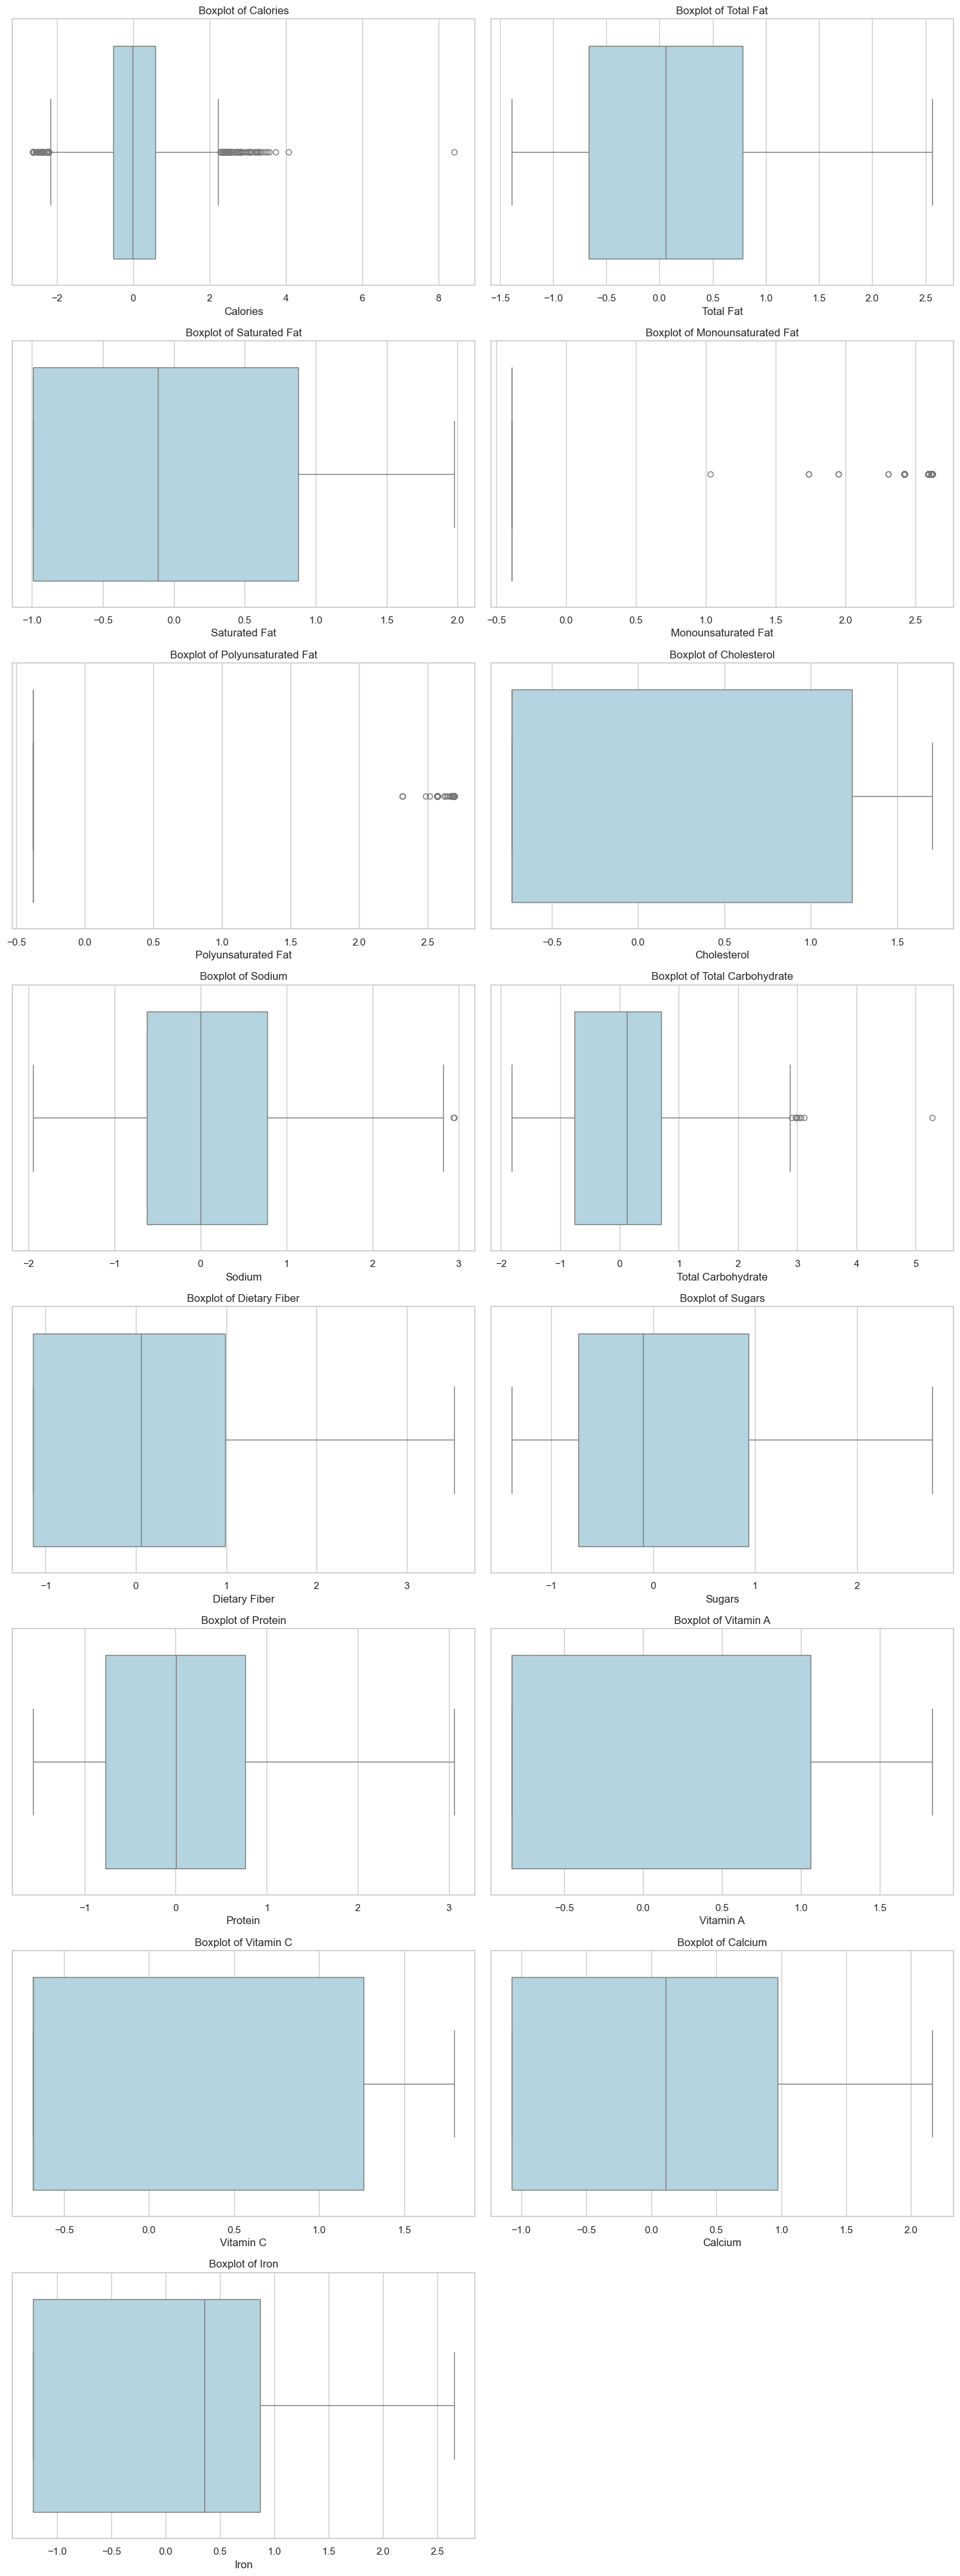

In [208]:


# Set up the number of subplots
n_cols = 2
n_rows = (len(continuous_cols) + 1) // n_cols

plt.figure(figsize=(15, 5 * n_rows))
sns.set(style="whitegrid")

for idx, col in enumerate(continuous_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(data=X_train, x=col, color="lightblue")
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [209]:
# Identify columns with outliers using the IQR method
outlier_columns = []

for col in continuous_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X_train[(df[col] < lower_bound) | (X_train[col] > upper_bound)]
    
    if not outliers.empty:
        outlier_columns.append(col)

print("Columns with outliers (based on IQR):")
print(outlier_columns)


Columns with outliers (based on IQR):
['Calories', 'Monounsaturated Fat', 'Polyunsaturated Fat', 'Sodium', 'Total Carbohydrate']


C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1658933168.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = X_train[(df[col] < lower_bound) | (X_train[col] > upper_bound)]
C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1658933168.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = X_train[(df[col] < lower_bound) | (X_train[col] > upper_bound)]
C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1658933168.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = X_train[(df[col] < lower_bound) | (X_train[col] > upper_bound)]
C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1658933168.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = X_train[(df[col] < lower_bound) | (X_train[col] > upper_bound)]
C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1658933168.py:11: UserWarning: Boolean Series key will be reindexed to 

In [210]:
# Identify columns with outliers using the IQR method
outlier_columns = []

for col in continuous_cols:
    Q1 = X_test[col].quantile(0.25)
    Q3 = X_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X_test[(df[col] < lower_bound) | (X_test[col] > upper_bound)]
    
    if not outliers.empty:
        outlier_columns.append(col)

print("Columns with outliers (based on IQR):")
print(outlier_columns)


Columns with outliers (based on IQR):
['Calories', 'Monounsaturated Fat', 'Polyunsaturated Fat', 'Sodium', 'Total Carbohydrate']


C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1312242927.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = X_test[(df[col] < lower_bound) | (X_test[col] > upper_bound)]
C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1312242927.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = X_test[(df[col] < lower_bound) | (X_test[col] > upper_bound)]
C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1312242927.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = X_test[(df[col] < lower_bound) | (X_test[col] > upper_bound)]
C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1312242927.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = X_test[(df[col] < lower_bound) | (X_test[col] > upper_bound)]
C:\Users\DELL\AppData\Local\Temp\ipykernel_11988\1312242927.py:11: UserWarning: Boolean Series key will be reindexed to match Da

In [211]:
from scipy.stats import zscore
import numpy as np

# 1. Z-score capping
zscore_cols = ['Calories', 'Sodium', 'Total Carbohydrate']
z_thresh = 3

for col in zscore_cols:
    z_scores = zscore(X_train[col])
    X_train[col] = np.where(z_scores > z_thresh, X_train[col].mean() + z_thresh * X_train[col].std(),
                np.where(z_scores < -z_thresh, X_train[col].mean() - z_thresh * X_train[col].std(), X_train[col]))

# 2. IQR capping
iqr_cols = ['Monounsaturated Fat', 'Polyunsaturated Fat', 'Protein']

for col in iqr_cols:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    X_train[col] = np.where(X_train[col] < lower_bound, lower_bound,
                np.where(X_train[col] > upper_bound, upper_bound, X_train[col]))


In [212]:
print(X_train.shape)
print(y_train.shape)

(8735, 17)
(8735,)


In [213]:
from collections import Counter

print("Original class distribution:", Counter(y_train))


Original class distribution: Counter({"'In Moderation'": 4253, "'Less Often'": 3961, "'More Often'": 521})


In [214]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("✅ After SMOTE:", Counter(y_train_resampled))


✅ After SMOTE: Counter({"'In Moderation'": 4253, "'Less Often'": 4253, "'More Often'": 4253})


In [215]:
X_train.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
7535,-0.816756,-0.244148,-0.110748,-0.387193,-0.375554,-0.202168,-0.731141,0.935952,-0.657352,0.061331,0.099698,-0.132183,-0.317734,0.492786,1.713051,0.544547,-1.217441
10675,-0.134493,-1.386076,-0.990198,-0.387193,-0.375554,-0.202168,-0.731141,0.350585,0.542717,-1.135399,-1.384516,-0.132183,0.001613,-0.831419,-0.680022,-1.070358,-0.113410
10960,-0.255188,0.639563,0.666432,-0.387193,-0.375554,-0.202168,-0.731141,0.087062,-0.310153,0.061331,-0.361268,-0.132183,-0.317734,-0.831419,-0.680022,-1.070358,-1.217441
9725,-1.798480,-1.386076,-0.990198,-0.387193,-0.375554,-0.202168,-0.731141,0.751287,-1.096873,-1.135399,-0.361268,-0.132183,-1.561900,-0.831419,-0.680022,-1.070358,-1.217441
6429,-1.389494,-0.244148,-0.990198,-0.387193,-0.375554,-0.202168,-0.731141,0.244937,-1.388036,-1.135399,-1.384516,-0.132183,0.001613,-0.831419,-0.680022,-1.070358,-1.217441


In [216]:
y_train

7535     'In Moderation'
10675    'In Moderation'
10960       'Less Often'
9725     'In Moderation'
6429     'In Moderation'
              ...       
7127        'Less Often'
9902        'Less Often'
2239     'In Moderation'
6647        'Less Often'
2320     'In Moderation'
Name: class, Length: 8735, dtype: object

In [217]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_resampled)
y_test_encoded = le.transform(y_test)

# Optional: print label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {"'In Moderation'": 0, "'Less Often'": 1, "'More Often'": 2}


In [218]:

# Check class distribution in training and test sets
print("Training Set Distribution:")
print(pd.Series(y_train_encoded).value_counts())
print("\nTest Set Distribution:")
print(pd.Series(y_test_encoded).value_counts())


Training Set Distribution:
0    4253
1    4253
2    4253
Name: count, dtype: int64

Test Set Distribution:
0    1063
1     991
2     130
Name: count, dtype: int64


In [225]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform  # for sampling C on a log scale
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define parameter distribution for C (regularization strength)
param_dist = {
    'estimator__C': loguniform(1e-4, 1e2)  # samples C between 0.0001 and 100 on a log scale
}

# 1. Randomized Search for Multinomial Logistic Regression
multi_log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

random_search_multi = RandomizedSearchCV(
    estimator=multi_log_reg,
    param_distributions={'C': loguniform(1e-4, 1e2)},
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_multi.fit(X_train_resampled, y_train_encoded)

print(f"Best C for Multinomial Logistic Regression: {random_search_multi.best_params_['C']}")



Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best C for Multinomial Logistic Regression: 2.465832945854912


In [226]:
y_pred_multi = random_search_multi.predict(X_test)

print("\n🔹 Tuned Multinomial Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_multi))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_multi))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_multi, target_names=le.classes_))



🔹 Tuned Multinomial Logistic Regression:
Accuracy: 0.7728937728937729
Confusion Matrix:
 [[769 217  77]
 [199 790   2]
 [  1   0 129]]
Classification Report:
                  precision    recall  f1-score   support

'In Moderation'       0.79      0.72      0.76      1063
   'Less Often'       0.78      0.80      0.79       991
   'More Often'       0.62      0.99      0.76       130

       accuracy                           0.77      2184
      macro avg       0.73      0.84      0.77      2184
   weighted avg       0.78      0.77      0.77      2184



In [227]:
ovr_model = OneVsRestClassifier(
    LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    )
)

random_search_ovr = RandomizedSearchCV(
    estimator=ovr_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search_ovr.fit(X_train_resampled, y_train_encoded)
print(f"Best C for One-vs-Rest Logistic Regression: {random_search_ovr.best_params_['estimator__C']}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best C for One-vs-Rest Logistic Regression: 50.61576888752309


In [228]:
y_pred_ovr = random_search_ovr.predict(X_test)

print("\n🔹 Tuned One-vs-Rest Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_ovr))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_ovr))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_ovr, target_names=le.classes_))



🔹 Tuned One-vs-Rest Logistic Regression:
Accuracy: 0.700091575091575
Confusion Matrix:
 [[629 216 218]
 [133 770  88]
 [  0   0 130]]
Classification Report:
                  precision    recall  f1-score   support

'In Moderation'       0.83      0.59      0.69      1063
   'Less Often'       0.78      0.78      0.78       991
   'More Often'       0.30      1.00      0.46       130

       accuracy                           0.70      2184
      macro avg       0.63      0.79      0.64      2184
   weighted avg       0.77      0.70      0.72      2184



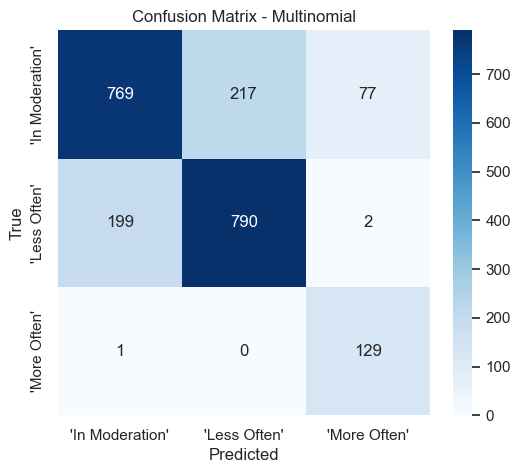

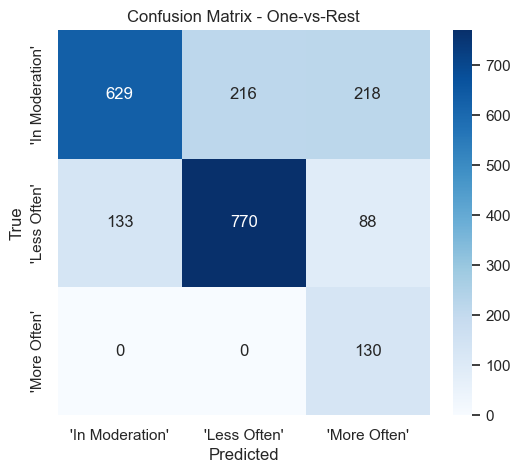

In [229]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

plot_confusion(y_test_encoded, y_pred_multi, "Confusion Matrix - Multinomial")
plot_confusion(y_test_encoded, y_pred_ovr, "Confusion Matrix - One-vs-Rest")


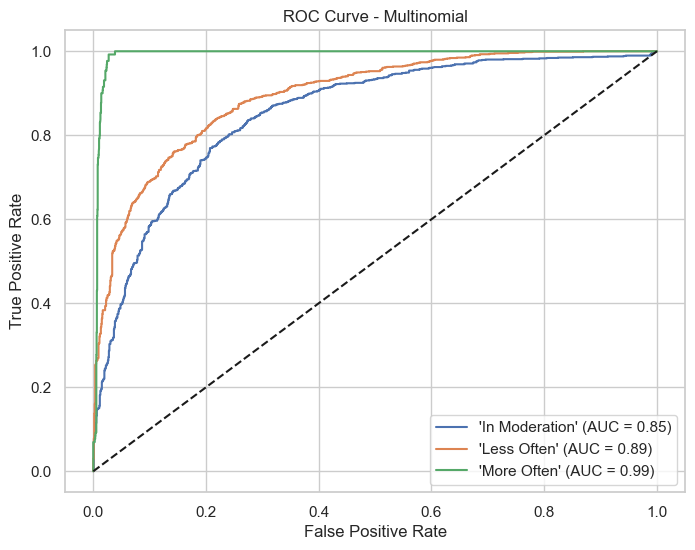

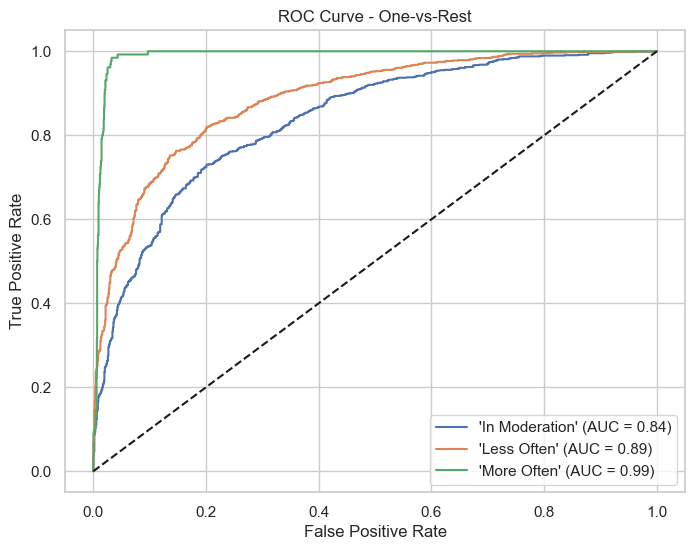

In [231]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc
y_test_bin = label_binarize(y_test_encoded, classes=np.unique(y_test_encoded))

y_score_multi = random_search_multi.predict_proba(X_test)
y_score_ovr = random_search_ovr.predict_proba(X_test)

def plot_roc(y_test_bin, y_score, model_name):
    n_classes = y_test_bin.shape[1]
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{le.classes_[i]} (AUC = {roc_auc:.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc(y_test_bin, y_score_multi, "Multinomial")
plot_roc(y_test_bin, y_score_ovr, "One-vs-Rest")


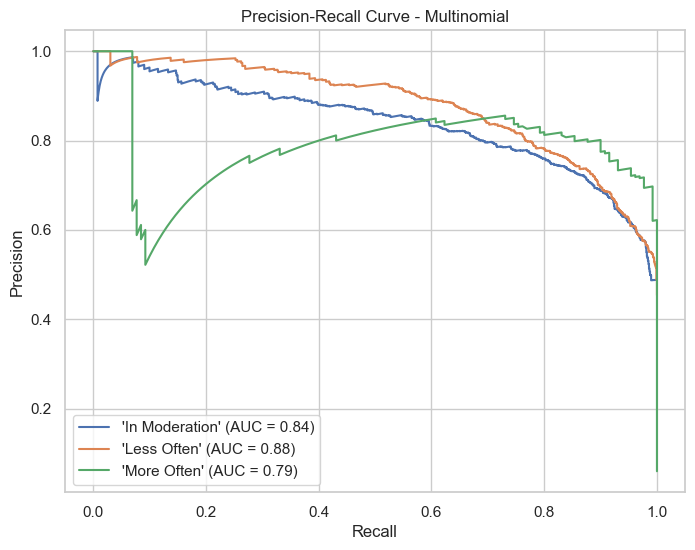

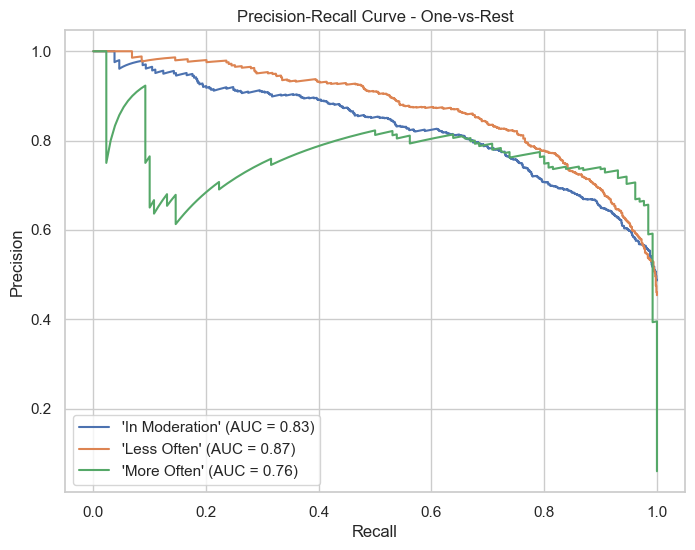

In [232]:
def plot_pr(y_test_bin, y_score, model_name):
    n_classes = y_test_bin.shape[1]
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f"{le.classes_[i]} (AUC = {pr_auc:.2f})")
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pr(y_test_bin, y_score_multi, "Multinomial")
plot_pr(y_test_bin, y_score_ovr, "One-vs-Rest")


In [233]:
from sklearn.linear_model import LogisticRegression

# Lasso (L1) regularized logistic regression
lasso_model = LogisticRegression(penalty='l1', solver='saga', multi_class='ovr', max_iter=1000, class_weight='balanced')
lasso_model.fit(X_train_resampled, y_train_encoded)

y_pred_lasso = lasso_model.predict(X_test)
y_proba_lasso = lasso_model.predict_proba(X_test)


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [234]:
from sklearn.metrics import classification_report

print("Classification Report - Lasso:\n", classification_report(y_test_encoded, y_pred_lasso, target_names=le.classes_))


Classification Report - Lasso:
                  precision    recall  f1-score   support

'In Moderation'       0.82      0.67      0.74      1063
   'Less Often'       0.76      0.83      0.80       991
   'More Often'       0.57      1.00      0.73       130

       accuracy                           0.76      2184
      macro avg       0.72      0.84      0.75      2184
   weighted avg       0.78      0.76      0.76      2184



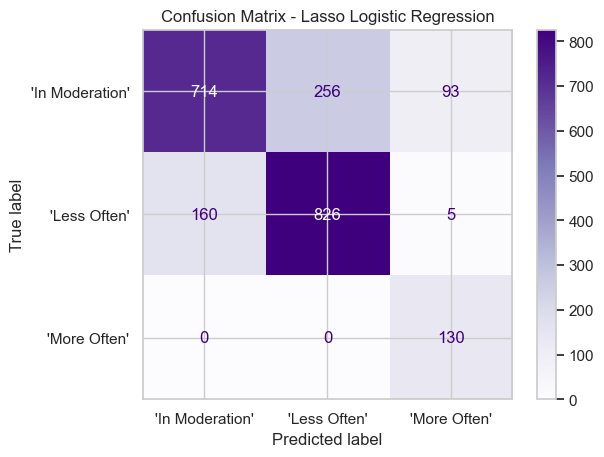

In [235]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_lasso = confusion_matrix(y_test_encoded, y_pred_lasso)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lasso, display_labels=le.classes_)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Lasso Logistic Regression")
plt.show()


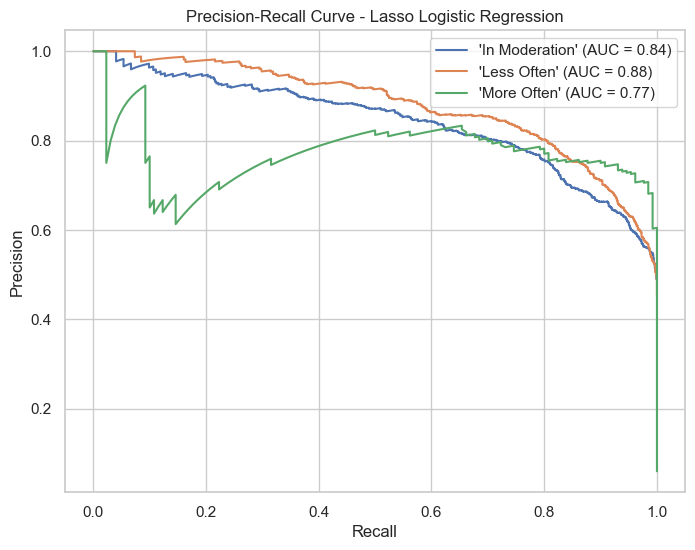

In [236]:
plot_pr(y_test_bin, y_proba_lasso, "Lasso Logistic Regression")


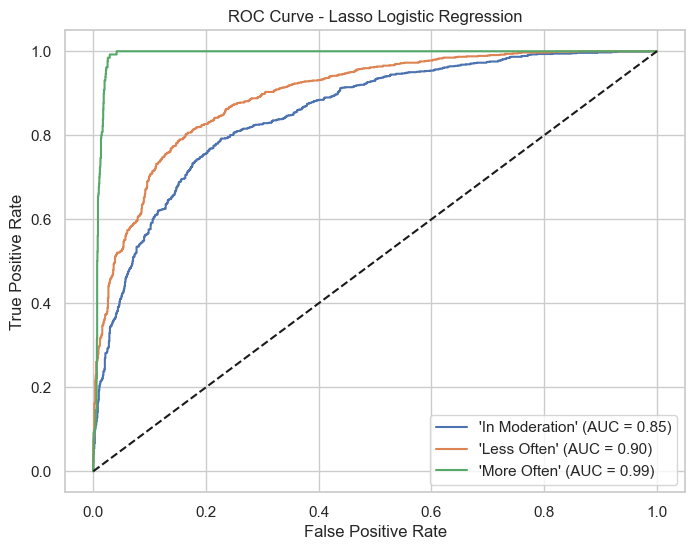

In [242]:
from sklearn.metrics import roc_curve, auc


def plot_roc(y_test_bin, y_score, model_name):
    n_classes = y_test_bin.shape[1]
    plt.figure(figsize=(8,6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{le.classes_[i]} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc(y_test_bin, y_proba_lasso, "Lasso Logistic Regression")
